<a href="https://colab.research.google.com/github/abhimithra02/Capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import numpy as py
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style="ticks",color_codes=True)

from IPython.display import Image
from collections import defaultdict
from sklearn import svm,tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE,SelectKBest,chi2,SelectFromModel
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [ ]:
os.chdir("D:\DATA\Imartics\Python")

In [ ]:
colnames = ['existingchecking', 'duration', 'credithistory', 'purpose', 
            'creditamount', 'savings', 'employmentsince', 'installmentrate', 
            'statussex', 'otherdebtors', 'residencesince', 'property', 'age', 
            'otherinstallmentplans', 'housing', 'existingcredits', 'job',
            'peopleliable', 'telephone', 'foreignworker', 
            'Defaulter_NonDefaulter']
credit=pd.read_csv("german_credit.csv",delimiter=',',names=colnames)
print(credit.shape)
print(credit.columns)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'employmentsince', 'installmentrate',
       'statussex', 'otherdebtors', 'residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'Defaulter_NonDefaulter'],
      dtype='object')


In [ ]:
credit.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,Defaulter_NonDefaulter
0,A11,6,A34,A43,1169.0,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,2


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
existingchecking          1000 non-null object
duration                  1000 non-null int64
credithistory             1000 non-null object
purpose                   1000 non-null object
creditamount              997 non-null float64
savings                   1000 non-null object
employmentsince           998 non-null object
installmentrate           1000 non-null int64
statussex                 1000 non-null object
otherdebtors              1000 non-null object
residencesince            1000 non-null int64
property                  1000 non-null object
age                       997 non-null float64
otherinstallmentplans     1000 non-null object
housing                   1000 non-null object
existingcredits           1000 non-null int64
job                       1000 non-null object
peopleliable              1000 non-null int64
telephone                 1000 non-null object
foreign

In [ ]:
credit.isnull().sum()

existingchecking          0
duration                  0
credithistory             0
purpose                   0
creditamount              3
savings                   0
employmentsince           2
installmentrate           0
statussex                 0
otherdebtors              0
residencesince            0
property                  0
age                       3
otherinstallmentplans     0
housing                   0
existingcredits           0
job                       0
peopleliable              0
telephone                 0
foreignworker             2
Defaulter_NonDefaulter    0
dtype: int64

In [ ]:
def missing_val_imput(dataset,col):
    dataset.loc[dataset[col].isnull(),col]=dataset[col].median()
    print("missing value for {} done".format(col))
    return

In [ ]:
missing_val_imput(credit,"age")

missing value for age done


In [ ]:
missing_val_imput(credit,"creditamount")

missing value for creditamount done


In [ ]:
def missing_val_imput_cat(dataset,col):
    dataset.loc[dataset[col].isnull(),col]=dataset[col].mode()[0]
    print("missing value for {} done".format(col))
    return

In [ ]:
missing_val_imput_cat(credit,"employmentsince")

missing value for employmentsince done


In [ ]:
missing_val_imput_cat(credit,"foreignworker")

missing value for foreignworker done


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
existingchecking          1000 non-null object
duration                  1000 non-null int64
credithistory             1000 non-null object
purpose                   1000 non-null object
creditamount              1000 non-null float64
savings                   1000 non-null object
employmentsince           1000 non-null object
installmentrate           1000 non-null int64
statussex                 1000 non-null object
otherdebtors              1000 non-null object
residencesince            1000 non-null int64
property                  1000 non-null object
age                       1000 non-null float64
otherinstallmentplans     1000 non-null object
housing                   1000 non-null object
existingcredits           1000 non-null int64
job                       1000 non-null object
peopleliable              1000 non-null int64
telephone                 1000 non-null object
fore

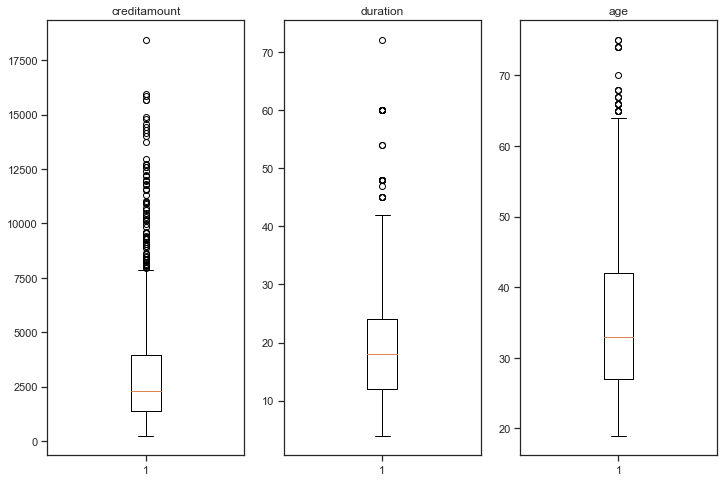

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=3,figsize=(12,8))
axes[0].boxplot(credit['creditamount'])
axes[0].set_title('creditamount')
axes[1].boxplot(credit['duration'])
axes[1].set_title('duration')
axes[2].boxplot(credit['age'])
axes[2].set_title('age')
fig.savefig('boxplots.png')

In [ ]:
credit["Defaulter_NonDefaulter"].replace([1,2],[0,1],inplace=True)
credit["Defaulter_NonDefaulter"].value_counts()

0    700
1    300
Name: Defaulter_NonDefaulter, dtype: int64

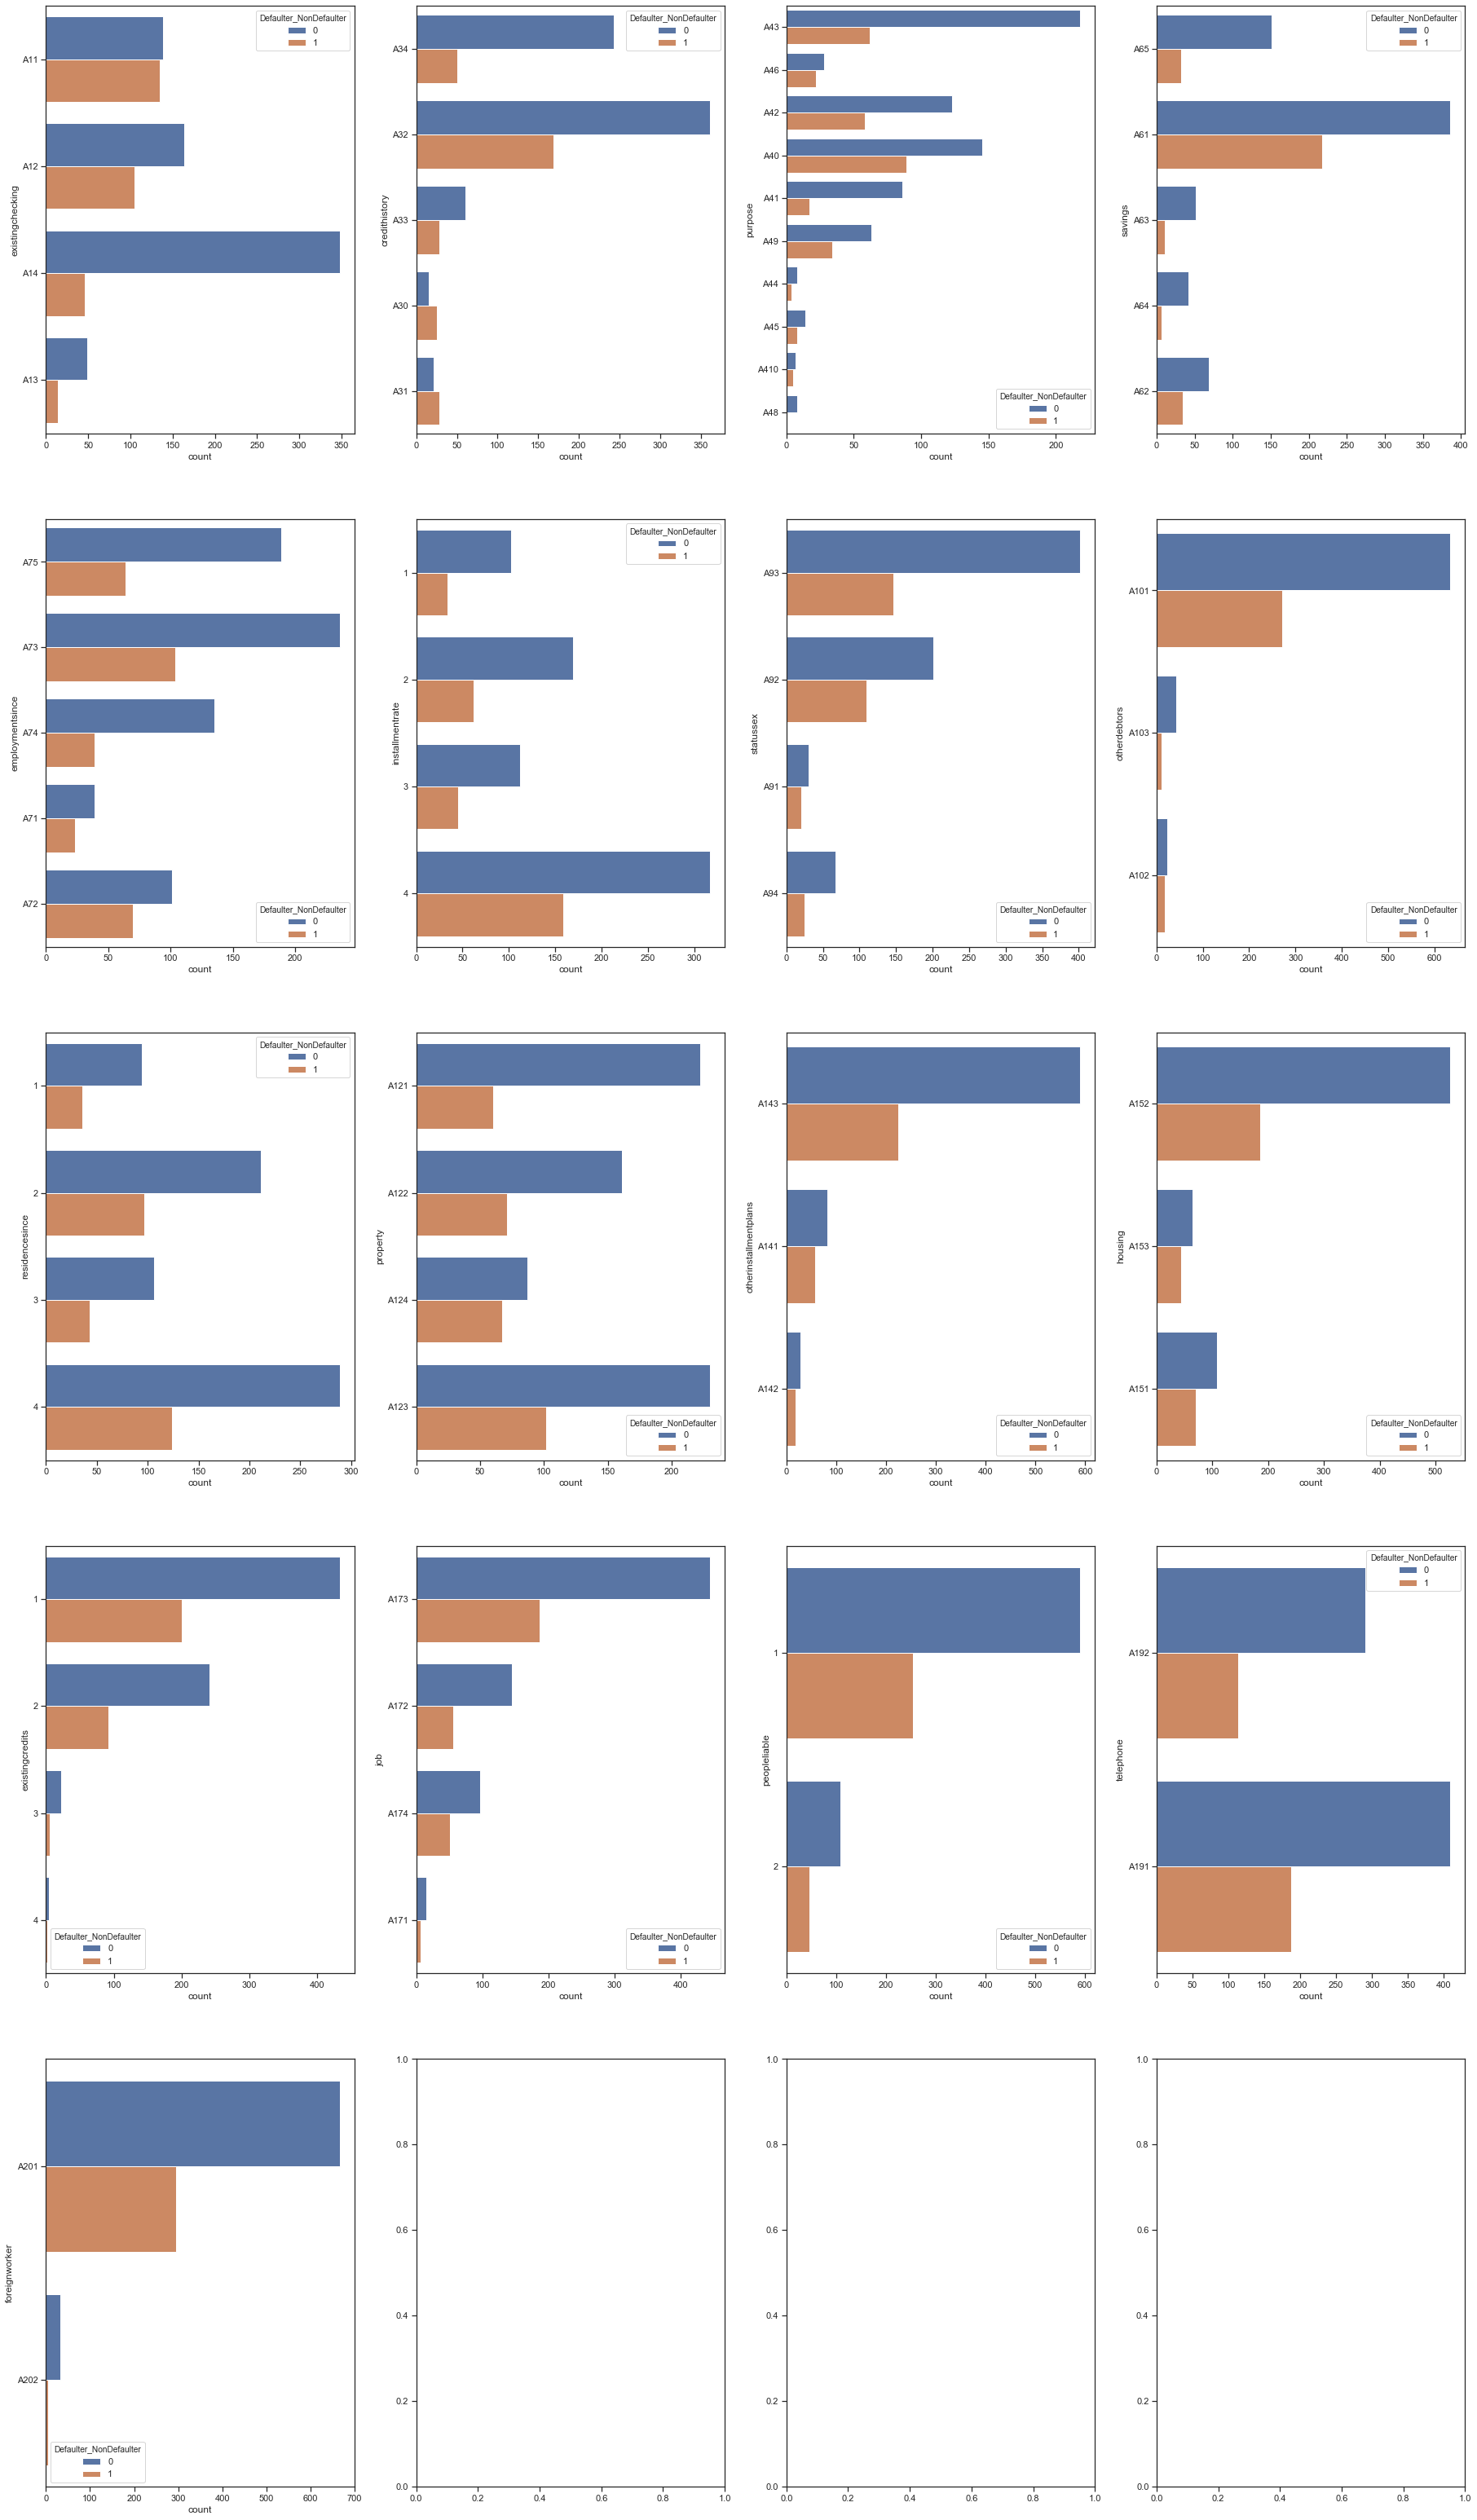

In [ ]:
f, axes=plt.subplots(5,4,figsize=(10.4*3,14*4))
x=0
y=0
for column in credit.drop(['Defaulter_NonDefaulter','creditamount','duration','age'],axis=1):
    sns.countplot(y=column,hue='Defaulter_NonDefaulter',data=credit.drop(['creditamount','duration','age'],axis=1),ax=axes[x,y])
    y+=1
    if y>3:
        x+=1
        y=0
    if x>4:
        break
f.savefig("D:\DATA\Imartics\Python\credit.png")

In [ ]:
catvars=['existingchecking','credithistory','purpose','savings','employmentsince','statussex','otherdebtors','property','otherinstallmentplans','housing','job','telephone','foreignworker']
numvars=['creditamount','duration','installmentrate','residencesince','age','existingcredits','peopleliable']

In [ ]:
x=credit.drop(["Defaulter_NonDefaulter"],axis=1)
y=credit["Defaulter_NonDefaulter"]

In [ ]:
x_dumm=pd.get_dummies(x,columns=catvars,drop_first=True)
x_dumm.columns

Index(['duration', 'creditamount', 'installmentrate', 'residencesince', 'age',
       'existingcredits', 'peopleliable', 'existingchecking_A12',
       'existingchecking_A13', 'existingchecking_A14', 'credithistory_A31',
       'credithistory_A32', 'credithistory_A33', 'credithistory_A34',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'employmentsince_A72', 'employmentsince_A73',
       'employmentsince_A74', 'employmentsince_A75', 'statussex_A92',
       'statussex_A93', 'statussex_A94', 'otherdebtors_A102',
       'otherdebtors_A103', 'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A142', 'otherinstallmentplans_A143',
       'housing_A152', 'housing_A153', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A192', 'foreignworker_A202'],
      dtype='object')

In [ ]:
len(x_dumm.columns)

48

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_dumm,y,test_size=0.20)

In [ ]:
scaler = StandardScaler()
x_train_standradized=scaler.fit_transform(x_train[numvars])
x_test_standradized=scaler.transform(x_test[numvars])
x_train_standradized=pd.DataFrame(x_train_standradized)
x_test_standradized=pd.DataFrame(x_test_standradized)

print("standradization done")

standradization done


In [ ]:
x_train_standradized.head()

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable
0,-0.333496,0.253496,0.008945,-0.753007,-0.413469,-0.706372,2.323790
1,-0.513312,-0.243758,0.903408,-0.753007,-1.033728,1.016486,-0.430331
2,1.240581,0.253496,-0.885518,-1.649445,1.713134,-0.706372,-0.430331
3,-0.659585,0.253496,0.903408,-0.753007,1.004266,-0.706372,-0.430331
4,-0.456947,-0.741011,0.903408,-0.753007,-0.413469,1.016486,2.323790


In [ ]:
x_train_standradized.columns=numvars
x_test_standradized.columns=numvars

In [ ]:
x_train_cat=x_train.drop(numvars,axis=1)
x_test_cat=x_test.drop(numvars,axis=1)

x_train_cat.reset_index(inplace=True,drop=True)
x_test_cat.reset_index(inplace=True,drop=True)

In [ ]:
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [ ]:
x_train_transform=pd.concat([x_train_standradized,x_train_cat],axis=1)
x_test_transform=pd.concat([x_test_standradized,x_test_cat],axis=1)

print(x_train_transform.shape)
print(x_test_transform.shape)

(800, 48)
(200, 48)


In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train.value_counts()

0    561
1    239
Name: Defaulter_NonDefaulter, dtype: int64

In [ ]:
sm = SMOTE(sampling_strategy=0.7)
x_train_transform_smot, y_train_smot=sm.fit_sample(x_train_transform,y_train)

In [ ]:
type(x_train_transform_smot)

numpy.ndarray

In [ ]:
x_train_transform_smot= pd.DataFrame(x_train_transform_smot)

In [ ]:
x_train_transform_smot.columns=x_train_transform_smot.columns

In [ ]:
y_train_smot=pd.Series(y_train_smot)

In [ ]:
y_train_smot.value_counts()

0    561
1    392
dtype: int64

In [ ]:
def get_eval(clf, X_train, y_train,y_test,y_pred):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    return

In [ ]:
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return

In [ ]:
# fit, train and cross validate Decision Tree with training and test data 
def dectreeclf(X_train, y_train,X_test, y_test):
    start = time.time()

    print("DecisionTreeClassifier")
    dec_tree = tree.DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = dec_tree.predict(X_test)

    # Export visualization as file
    #visualize_tree(dec_tree,X_train,y_train)
    
    # Get Cross Validation and Confusion matrix
    get_eval(dec_tree, X_train, y_train,y_test,y_pred)
        
    end = time.time()
    training_time = end-start
    print("Time taken: ", training_time)
    return

# Visualize tree and save as .pdf
# Only works for dataframes, not for numpy arrays

In [ ]:
# fit, train and cross validate Decision Tree with training and test data 
def randomforestclf(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = randomforest.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(randomforest, X_train, y_train,y_test,y_pred)
    return

In [ ]:
# fit, train and cross validate Decision Tree with training and test data 
def logregclf(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    logreg = LogisticRegression().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = logreg.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(logreg, X_train, y_train,y_test,y_pred)
    return

In [ ]:
def knnclf(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = knn.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(knn, X_train, y_train,y_test,y_pred)
    return

In [ ]:
print("clean resample")
dectreeclf(x_train_transform_smot,y_train_smot,x_test_transform,y_test)

clean resample
DecisionTreeClassifier
Cross Validation Accuracy: 0.72 (+/- 0.07)
Cross Validation Precision: 0.65 (+/- 0.06)
Cross Validation roc_auc: 0.75 (+/- 0.10)
[[118  21]
 [ 41  20]]
Time taken:  0.37769055366516113


In [ ]:
print("clean resample")
randomforestclf(x_train_transform,y_train,x_test_transform,y_test)

clean resample
RandomForestClassifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross Validation Accuracy: 0.71 (+/- 0.02)
Cross Validation Precision: 0.60 (+/- 0.10)
Cross Validation roc_auc: 0.76 (+/- 0.02)
[[129  10]
 [ 41  20]]


In [ ]:
print("clean resample")
logregclf(x_train_transform_smot,y_train_smot,x_test_transform,y_test)

clean resample
LogisticRegression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Cross Validation Accuracy: 0.74 (+/- 0.04)
Cross Validation Precision: 0.70 (+/- 0.05)
Cross Validation roc_auc: 0.81 (+/- 0.05)
[[119  20]
 [ 30  31]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [ ]:
print("clean resample")
knnclf(x_train_transform_smot,y_train_smot,x_test_transform,y_test)

clean resample
KNeighborsClassifier
Cross Validation Accuracy: 0.75 (+/- 0.07)
Cross Validation Precision: 0.65 (+/- 0.07)
Cross Validation roc_auc: 0.82 (+/- 0.08)
[[105  34]
 [ 31  30]]


In [ ]:
rfe=RFE(LogisticRegression(),10)
fit=rfe.fit(x_train_transform_smot,y_train_smot)
print("Num Feature:%d"%fit.n_features_)
print("selected Features:%s"%fit.support_)
print("Feature Ranking:%s"%fit.ranking_)

RFEX_train=rfe.transform(x_train_transform_smot)
RFEX_test=rfe.transform(x_test_transform)
RFEy_train=y_train_smot
RFEy_test=y_test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Num Feature:10
selected Features:[False False False False False False False False  True  True False  True
  True  True False False False  True False False False  True False False
 False False  True False False False False False False False False  True
 False False False False False False False False False False False  True]
Feature Ranking:[19  7 20 39 34 28 35 12  1  1 27  1  1  1  2  6  3  1 11 32 22  1  5 23
 37  8  1 17 30  4 36  9 26 31 33  1 25 24 29 21 10 16 38 14 13 15 18  1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [ ]:
imp_cols=fit.ranking_

In [ ]:
imp_cols=list(imp_cols)

In [ ]:
imp_var_ind =[]
for i in range(len(imp_cols)):
    if imp_cols[i]==1:
        imp_var_ind.append(i)

In [ ]:
imp_var_ind

[8, 9, 11, 12, 13, 17, 21, 26, 35, 47]

In [ ]:
var_list=x_train_transform_smot.columns

In [ ]:
x_train_transform_smot.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.333496,0.253496,0.008945,-0.753007,-0.413469,-0.706372,2.323790,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.513312,-0.243758,0.903408,-0.753007,-1.033728,1.016486,-0.430331,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.240581,0.253496,-0.885518,-1.649445,1.713134,-0.706372,-0.430331,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.659585,0.253496,0.903408,-0.753007,1.004266,-0.706372,-0.430331,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.456947,-0.741011,0.903408,-0.753007,-0.413469,1.016486,2.323790,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
var_name=[]
for i in imp_var_ind:
    var_name.append(var_list[i])
var_name

[8, 9, 11, 12, 13, 17, 21, 26, 35, 47]